#### Preparazione dataset

In [258]:
import pandas as pd
import datetime

df_PGSQL=pd.read_csv('insertion/insertions_log_PGSQL_2.csv',header=None,names=['version','file','start','end_preindex','end_index','range_preindex','range_total','timing_overall_PG','ram_insertion','ram_index','extra']).drop(labels=['start','end_preindex','end_index','timing_overall_PG','extra'], axis=1)

df_v3=pd.read_csv('insertion/insertion_logs/insertions_log_2_V3.csv',header=None,names=['version','file','start','end_preindex','end_index','range_preindex','range_total','timing_overall_PG','ram_insertion','ram_index','extra']).drop(labels=['start','end_preindex','end_index','timing_overall_PG','extra'], axis=1)

df_v5=pd.read_csv('insertion/insertion_logs/insertions_log_9.csv',header=None,names=['version','file','start','end_preindex','end_index','range_preindex','range_total','timing_overall_PG','ram_insertion','ram_index','extra']).drop(labels=['start','end_preindex','end_index','timing_overall_PG','extra'], axis=1)

df_samtools=pd.read_csv('insertion/sortindex_performance_samtools.csv',header=None,names=['iteration','file','start','end','ram_conversion','ram_sorting','extra'])


In [165]:
def Q1(x):
    return x.quantile(0.25)

def Q3(x):
    return x.quantile(0.75)


In [259]:
df_PGSQL['range_total']=(df_PGSQL['range_total']/1000000000)/60
df_PGSQL['ram_tot']=df_PGSQL.apply(lambda x: max(x['ram_insertion'],x['ram_index'])/1000,axis=1) 
df_PGSQL_grouped=df_PGSQL.groupby('file', as_index = False).agg({'range_total':['median',Q1,Q3  ],'ram_tot': ['median' ,Q1,Q3  ]})

In [260]:
df_v3['range_total']=(df_v3['range_total']/1000000000)/60
df_v3['ram_tot']=df_v3.apply(lambda x: max(x['ram_insertion'],x['ram_index'])/1000,axis=1) 
df_v3_grouped=df_v3.groupby('file', as_index = False).agg({'range_total':['median',Q1,Q3  ],'ram_tot': ['median' ,Q1,Q3  ]})


In [261]:
df_v5['range_total']=(df_v5['range_total']/1000000000)/60
df_v5['ram_tot']=df_v5.apply(lambda x: max(x['ram_insertion'],x['ram_index'])/1000,axis=1) 
df_v5_grouped=df_v5.groupby('file', as_index = False).agg({'range_total':['median',Q1,Q3  ],'ram_tot': ['median' ,Q1,Q3  ]})

In [262]:
df_samtools['start']=df_samtools['start'].apply(lambda x: datetime.datetime.strptime(x[:-3],'%Y-%m-%d %H:%M:%S.%f'))
df_samtools['end']=df_samtools['end'].apply(lambda x: datetime.datetime.strptime(x[:-3],'%Y-%m-%d %H:%M:%S.%f'))
df_samtools['range_total']=df_samtools.apply(lambda x: (x.end-x.start).total_seconds()/60,axis=1)
df_samtools['ram_tot']=df_samtools.apply(lambda x: max(x['ram_conversion'],x['ram_sorting'])/1000,axis=1) 
df_samtools_grouped=df_samtools.groupby('file', as_index = False).agg({'range_total':['median',Q1,Q3  ],'ram_tot': ['median' ,Q1,Q3  ]})

In [263]:
df_PGSQL_grouped['file']=df_PGSQL_grouped['file'].apply(lambda x: x.split('.')[0])
df_v3_grouped['file']=df_v3_grouped['file'].apply(lambda x: x.split('.')[0])
df_v5_grouped['file']=df_v5_grouped['file'].apply(lambda x: x.split('.')[0])

df_PGSQL_grouped=df_PGSQL_grouped.sort_values('file')
df_v3_grouped=df_v3_grouped.sort_values('file')
df_v5_grouped=df_v5_grouped.sort_values('file')
df_samtools_grouped=df_samtools_grouped.sort_values('file')

In [274]:
df_samtools_final=df_samtools_grouped['range_total'].rename({'median':'median_samtools','Q1':'Q1_samtools','Q3':'Q3_samtools'},axis=1)
df_v5_final=df_v5_grouped['range_total'].rename({'median':'median_v5','Q1':'Q1_v5','Q3':'Q3_v5'},axis=1)
df_v3_final=df_v3_grouped['range_total'].rename({'median':'median_v3','Q1':'Q1_v3','Q3':'Q3_v3'},axis=1)
df_PGSQL_final=df_PGSQL_grouped['range_total'].rename({'median':'median_PGSQL','Q1':'Q1_PGSQL','Q3':'Q3_PGSQL'},axis=1)

In [280]:
df_final_time=pd.concat([df_samtools_final[['median_samtools','Q1_samtools','Q3_samtools']],df_v5_final[['median_v5','Q1_v5','Q3_v5']],df_v3_final[['median_v3','Q1_v3','Q3_v3']],df_PGSQL_final[['median_PGSQL','Q1_PGSQL','Q3_PGSQL']]],axis=1)

In [317]:
df_final_time_t=df_final_time.T.rename({0:'ENCFF074VCI',1:'ENCFF272TLP',2:'ENCFF324LEM',3:'ENCFF469GFN',4:'ENCFF920NVC',5:'HG002_NA24385_son'},axis=1)
df_final_time_t

,ENCFF074VCI,ENCFF272TLP,ENCFF324LEM,ENCFF469GFN,ENCFF920NVC,HG002_NA24385_son
median_samtools,31.432463,101.094441,152.754649,13.652842,111.881223,292.329132
Q1_samtools,31.243868,100.184591,151.685366,13.550446,111.120430,270.404447
Q3_samtools,31.621058,102.610857,153.518422,13.693800,112.104985,293.089188
median_v5,9.099410,29.765931,46.953844,3.967865,35.908780,53.586250
Q1_v5,8.953522,29.583171,46.788007,3.943051,35.317774,52.714490
Q3_v5,9.209098,29.809115,47.634152,4.031359,36.122052,54.153995
median_v3,7.816482,26.247832,42.250858,3.186088,31.861961,46.331167
Q1_v3,7.749856,26.172116,42.003120,3.091641,31.438410,46.170747
Q3_v3,7.890405,26.325539,42.344172,3.309276,31.888996,50.296397
median_PGSQL,13.177557,32.235698,61.251879,5.138811,50.728873,81.219291


In [328]:
df_samtools_final=df_samtools_grouped['ram_tot'].rename({'median':'median_samtools','Q1':'Q1_samtools','Q3':'Q3_samtools'},axis=1)
df_v5_final=df_v5_grouped['ram_tot'].rename({'median':'median_v5','Q1':'Q1_v5','Q3':'Q3_v5'},axis=1)
df_v3_final=df_v3_grouped['ram_tot'].rename({'median':'median_v3','Q1':'Q1_v3','Q3':'Q3_v3'},axis=1)
df_PGSQL_final=df_PGSQL_grouped['ram_tot'].rename({'median':'median_PGSQL','Q1':'Q1_PGSQL','Q3':'Q3_PGSQL'},axis=1)

df_final_ram=pd.concat([df_samtools_final[['median_samtools','Q1_samtools','Q3_samtools']],df_v5_final[['median_v5','Q1_v5','Q3_v5']],df_v3_final[['median_v3','Q1_v3','Q3_v3']],df_PGSQL_final[['median_PGSQL','Q1_PGSQL','Q3_PGSQL']]],axis=1)

df_final_ram_t=df_final_ram.T.rename({0:'ENCFF074VCI',1:'ENCFF272TLP',2:'ENCFF324LEM',3:'ENCFF469GFN',4:'ENCFF920NVC',5:'HG002_NA24385_son'},axis=1)
df_final_ram_t

,ENCFF074VCI,ENCFF272TLP,ENCFF324LEM,ENCFF469GFN,ENCFF920NVC,HG002_NA24385_son
median_samtools,957.796,994.092,898.188,954.642,972.380,866.558
Q1_samtools,957.769,994.053,897.733,954.558,972.248,866.198
Q3_samtools,957.811,994.149,898.632,954.766,973.098,867.007
median_v5,1168.708,3022.928,2787.192,704.906,3481.216,4142.976
Q1_v5,1168.345,3017.906,2783.616,701.392,3481.076,4139.904
Q3_v5,1170.612,3039.215,2804.746,708.526,3481.908,4250.032
median_v3,420.892,956.596,1045.928,186.800,1469.300,1748.606
Q1_v3,420.374,949.419,1040.266,182.398,1468.191,1741.335
Q3_v3,421.138,963.226,1051.879,190.145,1470.661,1754.193
median_PGSQL,437.354,1008.643,1078.922,216.706,1510.853,1895.029


#### Grafico inserimenti

In [368]:
df_median_graph_time=df_final_time_t[::3].sort_values('ENCFF469GFN')
df_Q1_graph_time=df_final_time_t[1::3].sort_values('ENCFF469GFN')
df_Q3_graph_time=df_final_time_t[2::3].sort_values('ENCFF469GFN')

df_median_graph_ram=df_final_ram_t[::3].reindex(['median_v3','median_v5','median_PGSQL','median_samtools'])
df_Q1_graph_ram=df_final_ram_t[1::3].reindex(['Q1_v3','Q1_v5','Q1_PGSQL','Q1_samtools'])
df_Q3_graph_ram=df_final_ram_t[2::3].reindex(['Q3_v3','Q3_v5','Q3_PGSQL','Q3_samtools'])

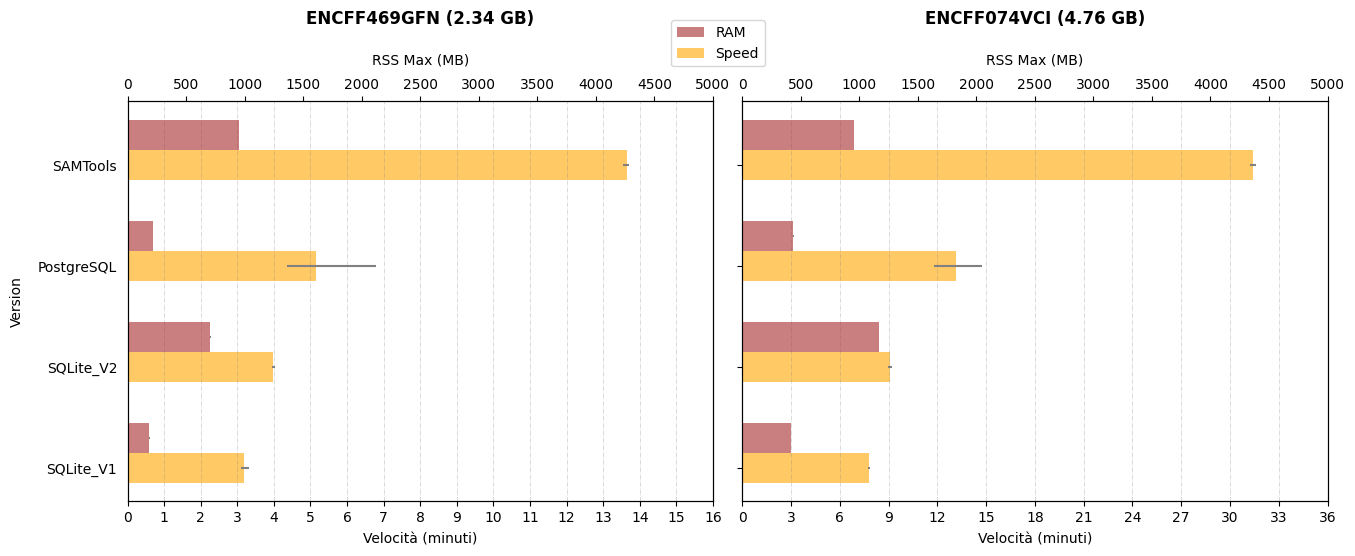

In [399]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches
import warnings

warnings.filterwarnings("ignore")

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15,5]

fig, ax = plt.subplots(1,2) #2,3
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,wspace=0.05, hspace=0.5)

x4=['SQLite_V1','SQLite_V2','PostgreSQL','SAMTools']
y4=list(df_median_graph_time['ENCFF469GFN']) #ENCFF469GFN
y4_ram=list(df_median_graph_ram['ENCFF469GFN']) #ENCFF469GFN

x1=['SQLite_V1','SQLite_V2','PostgreSQL','SAMTools']
y1=list(df_median_graph_time['ENCFF074VCI']) #ENCFF074VCI
y1_ram=list(df_median_graph_ram['ENCFF074VCI']) #ENCFF469GFN

height=0.3

#main barchart
bar01=ax[0].barh(x4, y4,height=height,xerr=[np.array(df_median_graph_time['ENCFF469GFN'])-np.array(df_Q1_graph_time['ENCFF469GFN']),np.array(df_Q3_graph_time['ENCFF469GFN'])-np.array(df_median_graph_time['ENCFF469GFN'])],alpha=0.6,color='orange',label='Speed',ecolor='grey')#,capsize=4
bar02=ax[1].barh(x1, y1,height=height,xerr=[np.array(df_median_graph_time['ENCFF074VCI'])-np.array(df_Q1_graph_time['ENCFF074VCI']),np.array(df_Q3_graph_time['ENCFF074VCI'])-np.array(df_median_graph_time['ENCFF074VCI'])],alpha=0.6,color='orange',label='Speed',ecolor='grey')#,capsize=4


#range su asse x
ax[0].xaxis.set_ticks(np.arange(0, max(y4)+3,1  ))
ax[1].xaxis.set_ticks(np.arange(0, max(y1)+5,3  ))


ax[0].yaxis.set_ticks_position('none')
ax[0].yaxis.set_tick_params(pad = 4)

#creazione secondo asse
ax2 = ax[0].twiny()
bar02=ax2.barh(np.array(range(0,4))+height, y4_ram,height=height,xerr=[np.array(df_median_graph_ram['ENCFF469GFN'])-np.array(df_Q1_graph_ram['ENCFF469GFN']),np.array(df_Q3_graph_ram['ENCFF469GFN'])-np.array(df_median_graph_ram['ENCFF469GFN'])],alpha=0.6,color='brown',label='RAM',ecolor='grey')
ax2.set_xlabel('RSS Max (MB)',labelpad=10)
ax2.xaxis.set_ticks(np.arange(0, 5500,500  ))#max(y4_ram)+500

ax3 = ax[1].twiny()
bar03=ax3.barh(np.array(range(0,4))+height, y1_ram,height=height,xerr=[np.array(df_median_graph_ram['ENCFF074VCI'])-np.array(df_Q1_graph_ram['ENCFF074VCI']),np.array(df_Q3_graph_ram['ENCFF074VCI'])-np.array(df_median_graph_ram['ENCFF074VCI'])],alpha=0.6,color='brown',label='RAM',ecolor='grey')
ax3.set_xlabel('RSS Max (MB)',labelpad=10)
ax3.xaxis.set_ticks(np.arange(0,5500,500  ))# max(y1_ram)+500


#disegna grid
ax[0].grid(b = True, color ='grey', axis='x', linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax[1].grid(b = True, color ='grey', axis='x', linestyle ='-.', linewidth = 0.5, alpha = 0.4)


ax[1].axes.yaxis.set_ticklabels([])


ax[0].set_ylabel('Version',labelpad=10)

ax[0].set_xlabel('Velocità (minuti)',labelpad=5)
ax[1].set_xlabel('Velocità (minuti)',labelpad=5)


#labels
ax[0].set_title('ENCFF469GFN (2.34 GB)\n', weight='bold')
ax[1].set_title('ENCFF074VCI (4.76 GB)\n', weight='bold')


bar1, labels1 = ax[0].get_legend_handles_labels()
bar2, labels2 = ax2.get_legend_handles_labels()

ax[1].legend(bar2+bar1,labels2+labels1,bbox_to_anchor=(0.05, 1.22), loc="upper right")

plt.show()


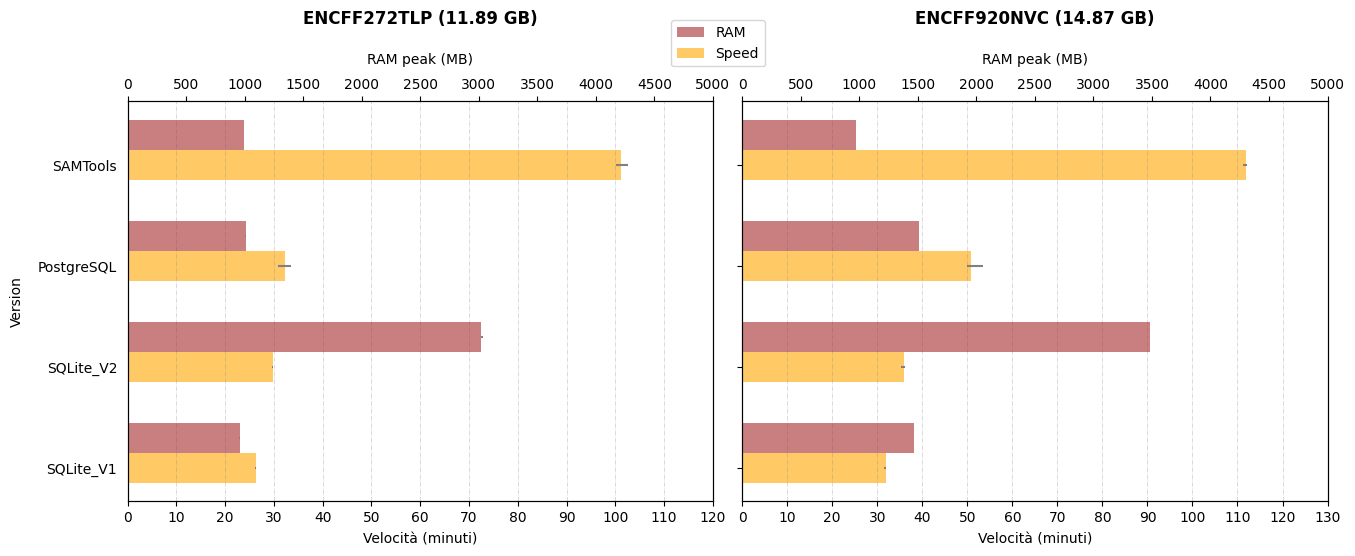

In [400]:

warnings.filterwarnings("ignore")

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15,5]

fig, ax = plt.subplots(1,2) #2,3
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,wspace=0.05, hspace=0.5)


x2=['SQLite_V1','SQLite_V2','PostgreSQL','SAMTools']
y2=list(df_median_graph_time['ENCFF272TLP']) #ENCFF272TLP
y2_ram=list(df_median_graph_ram['ENCFF272TLP']) #ENCFF469GFN


x4=['SQLite_V1','SQLite_V2','PostgreSQL','SAMTools']
y4=list(df_median_graph_time['ENCFF920NVC']) #ENCFF920NVC
y4_ram=list(df_median_graph_ram['ENCFF920NVC']) 


height=0.3
#main barchart
bar03=ax[0].barh(x2, y2,height=height,xerr=[np.array(df_median_graph_time['ENCFF272TLP'])-np.array(df_Q1_graph_time['ENCFF272TLP']),np.array(df_Q3_graph_time['ENCFF272TLP'])-np.array(df_median_graph_time['ENCFF272TLP'])],alpha=0.6,color='orange',label='Speed',ecolor='grey')#,capsize=4
bar01=ax[1].barh(x4, y4,height=height,xerr=[np.array(df_median_graph_time['ENCFF920NVC'])-np.array(df_Q1_graph_time['ENCFF920NVC']),np.array(df_Q3_graph_time['ENCFF920NVC'])-np.array(df_median_graph_time['ENCFF920NVC'])],alpha=0.6,color='orange',label='Speed',ecolor='grey')#,capsize=4


#range su asse x
ax[0].xaxis.set_ticks(np.arange(0, max(y2) +20 ,10 ))
ax[1].xaxis.set_ticks(np.arange(0, max(y4) +20,10 ))

ax[0].yaxis.set_ticks_position('none')
ax[0].yaxis.set_tick_params(pad = 4)

#creazione secondo asse
ax4 = ax[0].twiny()
bar04=ax4.barh(np.array(range(0,4))+height, y2_ram,height=height,xerr=[np.array(df_median_graph_ram['ENCFF272TLP'])-np.array(df_Q1_graph_ram['ENCFF272TLP']),np.array(df_Q3_graph_ram['ENCFF272TLP'])-np.array(df_median_graph_ram['ENCFF272TLP'])],alpha=0.6,color='brown',label='RAM',ecolor='grey')
ax4.set_xlabel('RAM peak (MB)',labelpad=10)
ax4.xaxis.set_ticks(np.arange(0,5500 ,500  ))#max(y2_ram)+500

ax2 = ax[1].twiny()
bar02=ax2.barh(np.array(range(0,4))+height, y4_ram,height=height,xerr=[np.array(df_median_graph_ram['ENCFF920NVC'])-np.array(df_Q1_graph_ram['ENCFF920NVC']),np.array(df_Q3_graph_ram['ENCFF920NVC'])-np.array(df_median_graph_ram['ENCFF920NVC'])],alpha=0.6,color='brown',label='RAM',ecolor='grey')
ax2.set_xlabel('RAM peak (MB)',labelpad=10)
ax2.xaxis.set_ticks(np.arange(0, 5500,500  ))#max(y4_ram)+500


#disegna grid
ax[0].grid(b = True, color ='grey', axis='x', linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax[1].grid(b = True, color ='grey', axis='x', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

ax[1].axes.yaxis.set_ticklabels([])

ax[0].set_ylabel('Version',labelpad=10)

ax[0].set_xlabel('Velocità (minuti)',labelpad=5)
ax[1].set_xlabel('Velocità (minuti)',labelpad=5)


#labels
ax[0].set_title('ENCFF272TLP (11.89 GB)\n', weight='bold')
ax[1].set_title('ENCFF920NVC (14.87 GB)\n', weight='bold')

bar1, labels1 = ax[0].get_legend_handles_labels()
bar2, labels2 = ax2.get_legend_handles_labels()

ax[1].legend(bar2+bar1,labels2+labels1,bbox_to_anchor=(0.05, 1.22), loc="upper right")

plt.show()

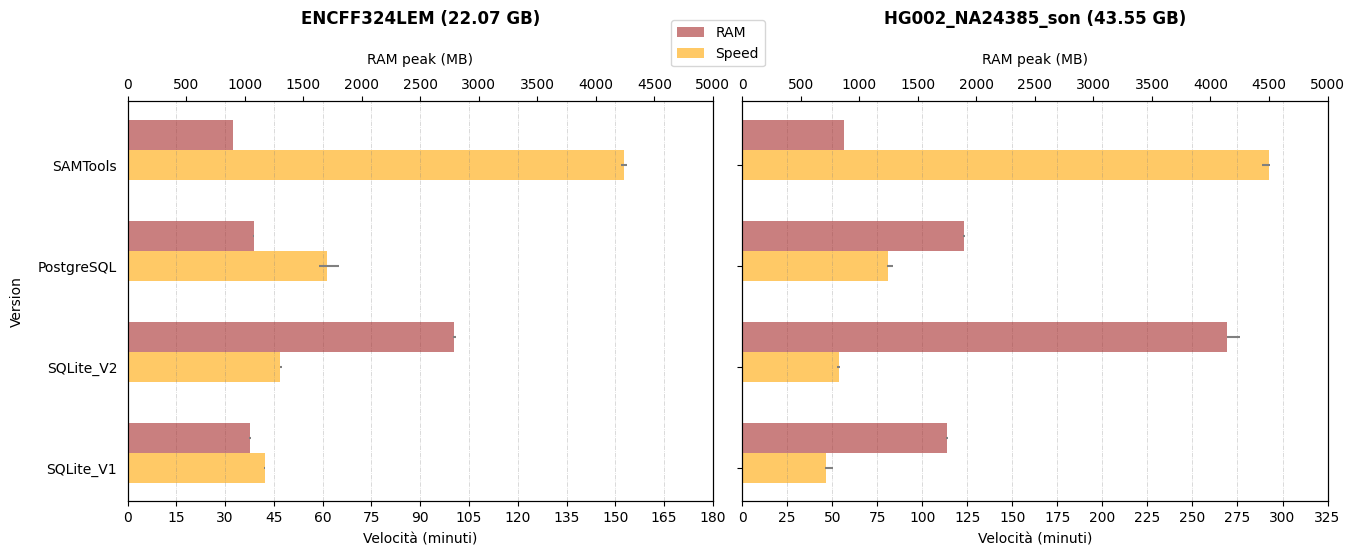

In [401]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches
import warnings

warnings.filterwarnings("ignore")

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['figure.figsize'] = [15,5]

fig, ax = plt.subplots(1,2) #2,3
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,wspace=0.05, hspace=0.5)

x1=['SQLite_V1','SQLite_V2','PostgreSQL','SAMTools']
y1=list(df_median_graph_time['ENCFF324LEM']) #ENCFF324LEM
y1_ram=list(df_median_graph_ram['ENCFF324LEM']) 

x2=['SQLite_V1','SQLite_V2','PostgreSQL','SAMTools']
y2=list(df_median_graph_time['HG002_NA24385_son']) #HG002_NA24385_son
y2_ram=list(df_median_graph_ram['HG002_NA24385_son'])

height=0.3
#main barchart
bar02=ax[0].barh(x1, y1,height=height,xerr=[np.array(df_median_graph_time['ENCFF324LEM'])-np.array(df_Q1_graph_time['ENCFF324LEM']),np.array(df_Q3_graph_time['ENCFF324LEM'])-np.array(df_median_graph_time['ENCFF324LEM'])],alpha=0.6,color='orange',label='Speed',ecolor='grey')#,capsize=4
bar03=ax[1].barh(x2, y2,height=height,xerr=[np.array(df_median_graph_time['HG002_NA24385_son'])-np.array(df_Q1_graph_time['HG002_NA24385_son']),np.array(df_Q3_graph_time['HG002_NA24385_son'])-np.array(df_median_graph_time['HG002_NA24385_son'])],alpha=0.6,color='orange',label='Speed',ecolor='grey')#,capsize=4


#range su asse x

ax[0].xaxis.set_ticks(np.arange(0, max(y1) +40 ,15  ))
ax[1].xaxis.set_ticks(np.arange(0, max(y2) +50 ,25  ))

ax[0].yaxis.set_ticks_position('none')
ax[0].yaxis.set_tick_params(pad = 4)

#creazione secondo asse

ax3 = ax[0].twiny()
bar03=ax3.barh(np.array(range(0,4))+height, y1_ram,height=height,xerr=[np.array(df_median_graph_ram['ENCFF324LEM'])-np.array(df_Q1_graph_ram['ENCFF324LEM']),np.array(df_Q3_graph_ram['ENCFF324LEM'])-np.array(df_median_graph_ram['ENCFF324LEM'])],alpha=0.6,color='brown',label='RAM',ecolor='grey')
ax3.set_xlabel('RAM peak (MB)',labelpad=10)
ax3.xaxis.set_ticks(np.arange(0,5500,500  ))# max(y1_ram)+500

ax4 = ax[1].twiny()
bar04=ax4.barh(np.array(range(0,4))+height, y2_ram,height=height,xerr=[np.array(df_median_graph_ram['HG002_NA24385_son'])-np.array(df_Q1_graph_ram['HG002_NA24385_son']),np.array(df_Q3_graph_ram['HG002_NA24385_son'])-np.array(df_median_graph_ram['HG002_NA24385_son'])],alpha=0.6,color='brown',label='RAM',ecolor='grey')
ax4.set_xlabel('RAM peak (MB)',labelpad=10)
ax4.xaxis.set_ticks(np.arange(0,5500 ,500  ))#max(y2_ram)+500

#disegna grid

ax[0].grid(b = True, color ='grey', axis='x', linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax[1].grid(b = True, color ='grey', axis='x', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

ax[1].axes.yaxis.set_ticklabels([])



ax[0].set_ylabel('Version',labelpad=10)


#labels

ax[0].set_xlabel('Velocità (minuti)',labelpad=5)
ax[1].set_xlabel('Velocità (minuti)',labelpad=5)



ax[0].set_title('ENCFF324LEM (22.07 GB)\n', weight='bold')
ax[1].set_title('HG002_NA24385_son (43.55 GB)\n', weight='bold')


bar1, labels1 = ax[0].get_legend_handles_labels()
bar2, labels2 = ax2.get_legend_handles_labels()

ax[1].legend(bar2+bar1,labels2+labels1,bbox_to_anchor=(0.05, 1.22), loc="upper right")

plt.show()
